# PRE-PROCESSING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
pd.set_option('float_format', '{:.2f}'.format)

In [2]:
data_train = pd.read_csv('train.csv')
data_train.SalePrice.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [3]:
X_test = pd.read_csv('test.csv')
y_test = pd.read_csv('sample_submission.csv')
y_test = y_test.drop(columns=['Id'])
data_test = pd.concat([X_test,y_test],axis=1)
data = pd.concat([data_train,data_test],ignore_index=True)
data = data.drop(columns=["Id"])

In [4]:
data_test.shape

(1459, 81)

In [5]:
data[data.index == 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.00


## GET NUMERICAL COLUMNS

In [6]:
mask = data.dtypes == np.object
categorical_cols = list(data.columns[mask])
numerical_cols = list(data.select_dtypes(include=['int64','float64']).columns)
#len(categorical_cols)
#numerical_cols

In [7]:
for i in categorical_cols:
    data = data.drop(i, axis=1)
data = data.drop(columns=["MoSold"])
numerical_cols.remove('MoSold')

## NUMBER OF MISSING DATA PER COLUMN

In [8]:
data.shape

(2919, 36)

In [9]:
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,60,65.00,8450,7,5,2003,2003,196.00,706.00,0.00,...,548.00,0,61,0,0,0,0,0,2008,208500.00
1,20,80.00,9600,6,8,1976,1976,0.00,978.00,0.00,...,460.00,298,0,0,0,0,0,0,2007,181500.00
2,60,68.00,11250,7,5,2001,2002,162.00,486.00,0.00,...,608.00,0,42,0,0,0,0,0,2008,223500.00
3,70,60.00,9550,7,5,1915,1970,0.00,216.00,0.00,...,642.00,0,35,272,0,0,0,0,2006,140000.00
4,60,84.00,14260,8,5,2000,2000,350.00,655.00,0.00,...,836.00,192,84,0,0,0,0,0,2008,250000.00
5,50,85.00,14115,5,5,1993,1995,0.00,732.00,0.00,...,480.00,40,30,0,320,0,0,700,2009,143000.00
6,20,75.00,10084,8,5,2004,2005,186.00,1369.00,0.00,...,636.00,255,57,0,0,0,0,0,2007,307000.00
7,60,nan,10382,7,6,1973,1973,240.00,859.00,32.00,...,484.00,235,204,228,0,0,0,350,2009,200000.00
8,50,51.00,6120,7,5,1931,1950,0.00,0.00,0.00,...,468.00,90,0,205,0,0,0,0,2008,129900.00
9,190,50.00,7420,5,6,1939,1950,0.00,851.00,0.00,...,205.00,0,4,0,0,0,0,0,2008,118000.00


In [10]:
missingValues = data.isna().sum()
#mask = data.value > 0
col = []
qnt = []
perc = []
total = data.shape[0]
for items in missingValues.iteritems():
    #print(items)
    if items[1] > 0:
        print(items)
        col.append(items[0])
        qnt.append(items[1])
        perc.append((items[1]/total)*100)
#print("FIM")

#for index, row in missingValues.iterrows():
#    print(row[index])

('LotFrontage', 486)
('MasVnrArea', 23)
('BsmtFinSF1', 1)
('BsmtFinSF2', 1)
('BsmtUnfSF', 1)
('TotalBsmtSF', 1)
('BsmtFullBath', 2)
('BsmtHalfBath', 2)
('GarageYrBlt', 159)
('GarageCars', 1)
('GarageArea', 1)


In [11]:
new_df = pd.DataFrame({"":col,"Missing Ratio":perc,"Missing Number":qnt})
new_df

,,Missing Ratio,Missing Number
0,LotFrontage,16.65,486
1,MasVnrArea,0.79,23
2,BsmtFinSF1,0.03,1
3,BsmtFinSF2,0.03,1
4,BsmtUnfSF,0.03,1
5,TotalBsmtSF,0.03,1
6,BsmtFullBath,0.07,2
7,BsmtHalfBath,0.07,2
8,GarageYrBlt,5.45,159
9,GarageCars,0.03,1


## FILL MISSING DATA, DROP SOME COLUMNS AND DATA

In [12]:
data = data[(data.MasVnrArea.notna())]
data = data[(data.BsmtFinSF1.notna())]
data = data[(data.BsmtFinSF2.notna())]
data = data[(data.BsmtUnfSF.notna())]
data = data[(data.TotalBsmtSF.notna())]
data = data[(data.BsmtFullBath.notna())]
data = data[(data.BsmtHalfBath.notna())]
data = data[(data.GarageCars.notna())]
data = data[(data.GarageArea.notna())]
data = data.drop(columns=["GarageYrBlt","LotFrontage"])

In [13]:
#numerical_cols
numerical_cols.remove('GarageYrBlt')
numerical_cols.remove('LotFrontage')

In [14]:
numerical_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [15]:
missingValues = data.isna().sum()
#mask = data.value > 0
for items in missingValues.iteritems():
    if items[1] > 0:
        print(items) 

## Check variables skewness

In [16]:
skewed_feats = data[numerical_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness

,Skewed Features
MiscVal,21.85
PoolArea,16.82
LotArea,12.95
LowQualFinSF,12.03
3SsnPorch,11.32
KitchenAbvGr,4.30
BsmtFinSF2,4.13
EnclosedPorch,4.02
ScreenPorch,3.93
BsmtHalfBath,3.91


In [17]:
data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,...,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00
mean,57.23,10150.74,6.08,5.57,1971.09,1984.11,102.31,441.37,49.91,559.77,...,472.34,93.97,47.10,23.09,2.63,16.21,2.27,51.28,2007.79,179862.69
std,42.61,7876.96,1.41,1.12,30.27,20.89,179.40,455.28,169.81,439.11,...,215.60,126.79,67.13,64.24,25.30,56.42,35.82,569.93,1.32,57338.05
min,20.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2006.00,34900.00
25%,20.00,7449.00,5.00,5.00,1953.00,1965.00,0.00,0.00,0.00,220.00,...,319.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2007.00,154300.00
50%,50.00,9452.00,6.00,5.00,1973.00,1993.00,0.00,368.00,0.00,467.00,...,478.00,0.00,26.00,0.00,0.00,0.00,0.00,0.00,2008.00,176515.50
75%,70.00,11553.00,7.00,6.00,2000.00,2004.00,164.00,733.00,0.00,801.00,...,576.00,168.00,69.00,0.00,0.00,0.00,0.00,0.00,2009.00,191745.39
max,190.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1526.00,2336.00,...,1488.00,1424.00,742.00,1012.00,508.00,576.00,800.00,17000.00,2010.00,755000.00


In [18]:
data_train = data[data.index <= 1459]

In [19]:
data_train[numerical_cols[0:10]].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
count,1452.00,1452.00,1452.00,1452.00,1452.00,1452.00,1452.00,1452.00,1452.00,1452.00
mean,56.95,10507.28,6.09,5.58,1971.12,1984.78,103.69,441.97,46.81,567.07
std,42.34,9989.56,1.38,1.11,30.19,20.65,181.07,455.36,161.73,442.08
min,20.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00
25%,20.00,7538.75,5.00,5.00,1954.00,1966.00,0.00,0.00,0.00,222.50
50%,50.00,9478.50,6.00,5.00,1972.00,1993.00,0.00,381.00,0.00,477.50
75%,70.00,11600.00,7.00,6.00,2000.00,2004.00,166.00,706.50,0.00,808.00
max,190.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00


In [20]:
data_train[numerical_cols[10:20]].describe()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
count,1452.00,1452.00,1452.00,1452.00,1452.00,1452.00,1452.00,1452.00,1452.00,1452.00
mean,1055.85,1161.27,346.94,5.88,1514.09,0.42,0.06,1.56,0.38,2.87
std,438.12,385.02,436.37,48.75,525.63,0.52,0.24,0.55,0.50,0.81
min,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00
25%,794.75,882.00,0.00,0.00,1128.00,0.00,0.00,1.00,0.00,2.00
50%,990.50,1086.00,0.00,0.00,1461.50,0.00,0.00,2.00,0.00,3.00
75%,1297.25,1391.00,728.00,0.00,1776.00,1.00,0.00,2.00,1.00,3.00
max,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00


In [21]:
data_train[numerical_cols[20:30]].describe()

,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
count,1452.00,1452.00,1452.00,1452.00,1452.00,1452.00,1452.00,1452.00,1452.00,1452.00
mean,1.05,6.52,0.61,1.77,472.48,94.42,46.39,21.94,3.43,15.14
std,0.22,1.63,0.64,0.75,214.11,125.39,66.05,61.09,29.40,55.90
min,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,5.00,0.00,1.00,327.75,0.00,0.00,0.00,0.00,0.00
50%,1.00,6.00,1.00,2.00,478.00,0.00,24.00,0.00,0.00,0.00
75%,1.00,7.00,1.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00
max,3.00,14.00,3.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00


In [22]:
data_train[numerical_cols[30:]].describe()

,PoolArea,MiscVal,YrSold,SalePrice
count,1452.00,1452.00,1452.00,1452.00
mean,2.77,43.73,2007.82,180615.06
std,40.29,497.48,1.33,79285.54
min,0.00,0.00,2006.00,34900.00
25%,0.00,0.00,2007.00,129900.00
50%,0.00,0.00,2008.00,162700.00
75%,0.00,0.00,2009.00,214000.00
max,738.00,15500.00,2010.00,755000.00


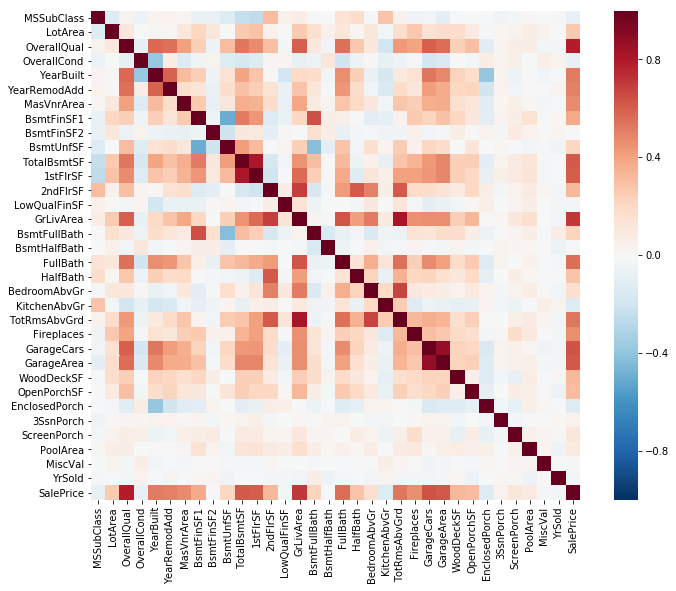

In [23]:
# Correlation Matrix Heatmap
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,cmap=sns.color_palette("RdBu_r", 1000), vmin=-1,vmax=1, square=True);

## Normalize all skewed variables

In [24]:
from scipy.stats import boxcox
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features".format(skewness.shape[0]))
skewed_features = skewness.index
for feat in skewed_features:
    if any(x<=0 for x in data[feat]):
        for i in data.index:
            data.loc[i,feat] += (1 + data[feat].min())
    data[feat] = np.log(data[feat])
    #data[feat], lam = boxcox(data[feat])
    #print('Lambda: ',lam)
    data[feat] = (data[feat] - data[feat].mean())/data[feat].std(ddof=0)

There are 34 skewed numerical features


In [25]:
data = data.sample(frac=1).reset_index(drop=True)
data_train = data[data.index <= 1459]
data_test = data[data.index > 1459] #1459

In [26]:
y = 'SalePrice'
data_train = data_train.sort_values(by='SalePrice')
feature_cols = [x for x in data.columns if x != y]
X_data_train = data_train[feature_cols]
X_data_test = data_test[feature_cols]
y_data_train = data_train[y]
y_data_test = data_test[y]

In [27]:
X_data_train.shape,X_data_test.shape,y_data_train.shape,y_data_test.shape

((1460, 33), (1433, 33), (1460,), (1433,))

## Plot distance matrix in order to see outliers

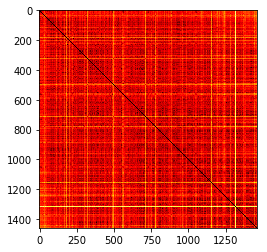

In [28]:
from sklearn.metrics.pairwise import euclidean_distances
from operator import itemgetter
distances = euclidean_distances(X_data_train,X_data_train)
m = list()
for i in range(len(distances[0])):
    m.append(np.sum(distances[i])/len(distances[0]))
m_sorted = sorted(m)
im = plt.imshow(distances, cmap='hot', interpolation='nearest')
values = np.unique(distances.ravel())
colors = [im.cmap(im.norm(value)) for value in values]
#plt.savefig('Heatmap4.png')
plt.show()
plt.close()

In [29]:
outliers = m_sorted[-round(0.15*len(m)):-1]
outliers_index = list()
for i in outliers:
    for j in range(len(m)):
        if m[j] == i:
            outliers_index.append(j)
X_data_train = X_data_train.drop(X_data_train.index[outliers_index])
y_data_train = y_data_train.drop(y_data_train.index[outliers_index])

## Drop 10% of highest avg distance, in order to remove outliers

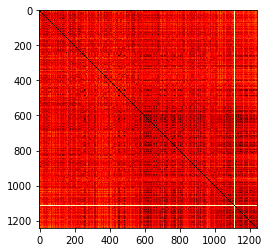

In [30]:
distances = euclidean_distances(X_data_train,X_data_train)
m = list()
for i in range(len(distances[0])):
    m.append(np.sum(distances[i])/len(distances[0]))
m_sorted = sorted(m)
plt.imshow(distances, cmap='hot', interpolation='nearest')
plt.savefig('Heatmap5.png')
plt.show()
plt.close()

In [31]:
from sklearn.cluster import KMeans
from sklearn import metrics
silhouette_values = dict()
for i in range(2, 11):
    silhouette_values[i] = list()
    for j in range(1,11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=1, random_state=j)
        silhouette_values[i].append( metrics.silhouette_score(X_data_train, kmeans.fit_predict(X_data_train) ) )
        

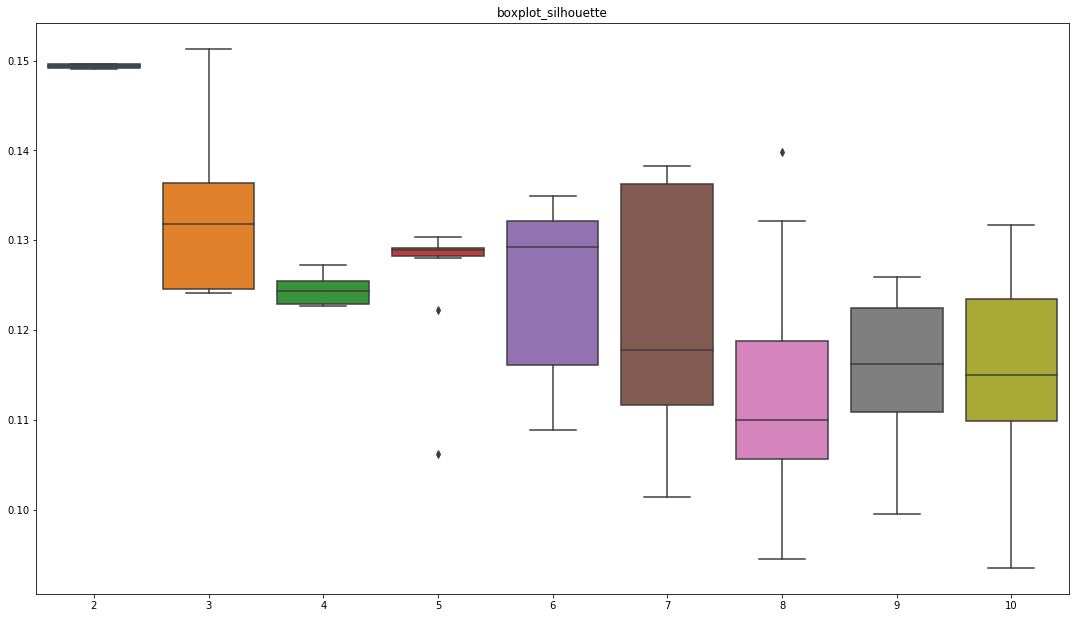

In [32]:
import seaborn as sns
df = pd.DataFrame(silhouette_values)
f, ax = plt.subplots(figsize=(18.5, 10.5))
fig = sns.boxplot(data=df)
fig.set_xticklabels(ax.get_xticklabels())
title = 'boxplot_silhouette'
ax.set_title(title)
plt.savefig(title+'.png')

# IN THIS SECTION, WE WILL CONVERT REGRESSION PROBLEM TO CLASSIFICATION

In [77]:
lim1 = np.percentile(y_data_train,50)
#lim1 = np.min(y_data_train) + (np.max(y_data_train) - np.min(y_data_train))/2

In [78]:
y_classes_train = list()
y_classes_test = list()
for value1 in y_data_train:
    if value1 <= lim1:
        y_classes_train.append('barata')
    else:
        y_classes_train.append('cara')

for value2 in y_data_test:
    if value2 <= lim1:
        y_classes_test.append('barata')
    else:
        y_classes_test.append('cara')
len(y_classes_train),len(y_classes_test)

(1242, 1433)

In [79]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_classes_train)
y_label_encoded_train = le.transform(y_classes_train)
y_label_encoded_test = le.transform(y_classes_test)

In [80]:
le.transform(y_classes_train)

array([0, 0, 0, ..., 1, 1, 1])

In [81]:
class_df_train = pd.DataFrame({"classes_train":y_label_encoded_train})
class_df_test = pd.DataFrame({"classes_teste":y_label_encoded_test})
#class_df.hist()

#### Histograma Train

In [82]:
values = class_df_train["classes_train"].value_counts(sort=True)
val_lista=[values[0],values[1]]
val_lista

[621, 621]

<BarContainer object of 2 artists>

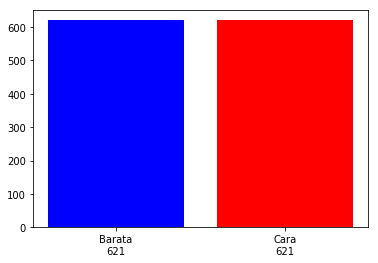

In [83]:
plt.bar(["Barata\n"+str(val_lista[0]),"Cara\n"+str(val_lista[1])], val_lista, color=["blue","red"], align='center')

#### Histograma Teste

In [84]:
values = class_df_test["classes_teste"].value_counts(sort=True)
val_lista=[values[0],values[1]]
val_lista

[744, 689]

<BarContainer object of 2 artists>

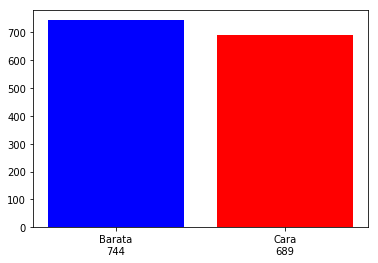

In [85]:
plt.bar(["Barata\n"+str(val_lista[0]),"Cara\n"+str(val_lista[1])], val_lista, color=["blue","red"], align='center')

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components=2, svd_solver = 'full')
X_2D = pca.fit_transform(scale(X_data_train))

/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


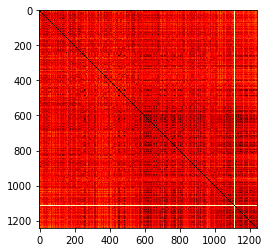

In [87]:
distances = euclidean_distances(X_data_train,X_data_train)
m = list()
for i in range(len(distances[0])):
    m.append(np.sum(distances[i])/len(distances[0]))
m_sorted = sorted(m)
plt.imshow(distances, cmap='hot', interpolation='nearest')
#plt.savefig('Heatmap6.png')
plt.show()
plt.close()

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_data_train, y_classes_train)
X_lda_train = lda.transform(X_data_train)
X_lda_test = lda.transform(X_data_test)
#X_lda_test = lda.fit_transform(X_data_test[numerical_cols], y_classes_test)
print(X_lda_train.shape,X_lda_test.shape)

(1242, 1) (1433, 1)


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [89]:
def plotClassification(x_data,y_data,img_name):
    print(len(x_data))
    print(len(y_data))
    caras = np.array([0]*x_data.shape[1])
    medias = np.array([0]*x_data.shape[1])
    baratas = np.array([0]*x_data.shape[1])
    i = 0
    for classe in y_data:
        if classe == 'barata':
            baratas = np.vstack((baratas,x_data[i]))
        elif classe == 'media':
            medias = np.vstack((medias,x_data[i]))
        elif classe == 'cara':
            caras = np.vstack((caras,x_data[i]))
        i += 1
    baratas = np.delete(baratas,0,0)
    medias = np.delete(medias,0,0)
    caras = np.delete(caras,0,0)
    dt = (baratas, medias, caras)
    colors = ("blue", "green", "red")
    groups = ("barata", "media", "cara")
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    #print(dt[0])
    for i in range(len(dt)):
        try:
            x_coordinates = dt[i][:,0]
            y_coordinates = dt[i][:,1]
        except:
            pass
        else:
            ax.scatter(x_coordinates, y_coordinates, alpha=0.8, c=colors[i], edgecolors='none', s=30, label=groups[i])
    #plt.legend(loc=2)
    #plt.savefig(img_name)
    plt.show()

In [90]:
print(X_lda_test.shape)

(1433, 1)


## Raw data after applied LDA

1242
1242


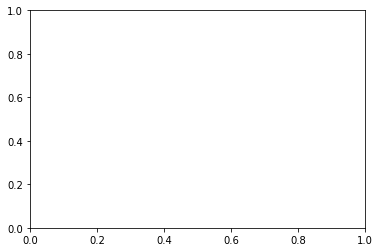

In [91]:
plotClassification(X_lda_train,y_classes_train,'LDA_classes.png')

## Raw data after applied PCA

1242
1242


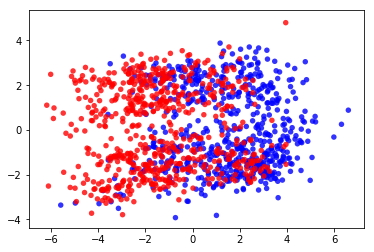

In [92]:
plotClassification(X_2D,y_classes_train,'PCA_classes.png')

In [93]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [94]:
le.transform(['barata', 'cara'])

array([0, 1])

## FIRST MODEL: LOGISTIC REGRESSION

1433
1433


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


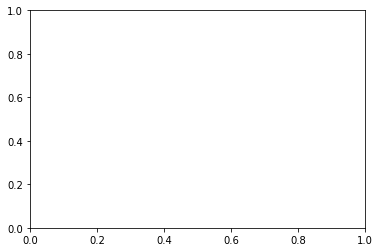

In [95]:
LR = LogisticRegression()
LR = LR.fit(X_lda_train, y_label_encoded_train)
y_predict = LR.predict(X_lda_test)
plotClassification(X_lda_test,le.inverse_transform(y_predict),'LDA_classes_predicted.png')

In [96]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[576 168]
 [161 528]]
              precision    recall  f1-score   support

      barata      0.782     0.774     0.778       744
        cara      0.759     0.766     0.762       689

   micro avg      0.770     0.770     0.770      1433
   macro avg      0.770     0.770     0.770      1433
weighted avg      0.771     0.770     0.770      1433



## SECOND MODEL: NAIVE BAYES

1433
1433


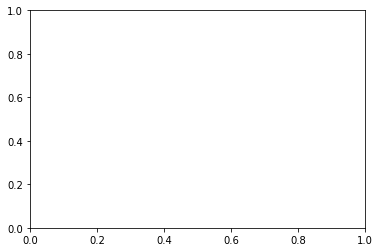

In [97]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_lda_train, y_label_encoded_train)
y_predict = gnb.predict(X_lda_test)
plotClassification(X_lda_test,le.inverse_transform(y_predict),'NaiveBayes.png')

In [98]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[574 170]
 [159 530]]
              precision    recall  f1-score   support

      barata      0.783     0.772     0.777       744
        cara      0.757     0.769     0.763       689

   micro avg      0.770     0.770     0.770      1433
   macro avg      0.770     0.770     0.770      1433
weighted avg      0.771     0.770     0.770      1433



### QUADRATIC DISCRIMINANT ANALYSIS (BAYESIANO QUADRATICO)

1433
1433


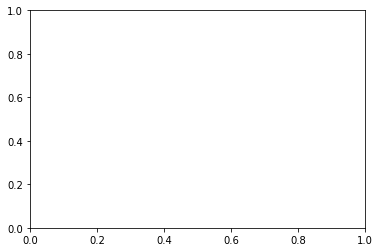

In [99]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_lda_train, y_label_encoded_train)
y_predict = qda.predict(X_lda_test)
plotClassification(X_lda_test,le.inverse_transform(y_predict),'QDA.png')

In [100]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[574 170]
 [159 530]]
              precision    recall  f1-score   support

      barata      0.783     0.772     0.777       744
        cara      0.757     0.769     0.763       689

   micro avg      0.770     0.770     0.770      1433
   macro avg      0.770     0.770     0.770      1433
weighted avg      0.771     0.770     0.770      1433



### LINEAR DISCRIMINANT ANALYSIS (BAYESIANO LINEAR)

1433
1433


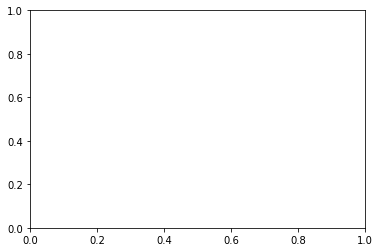

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_lda_train, y_label_encoded_train)
y_predict = lda.predict(X_lda_test)
plotClassification(X_lda_test,le.inverse_transform(y_predict),'LDA.png')

In [102]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[575 169]
 [159 530]]
              precision    recall  f1-score   support

      barata      0.783     0.773     0.778       744
        cara      0.758     0.769     0.764       689

   micro avg      0.771     0.771     0.771      1433
   macro avg      0.771     0.771     0.771      1433
weighted avg      0.771     0.771     0.771      1433



# LOGISTIC REGRESSION, ALL VARIABLES

1433
1433


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


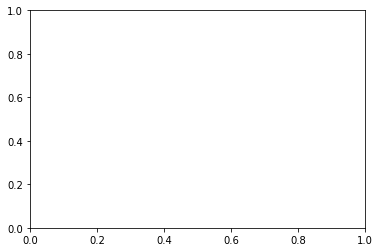

In [103]:
LR = LogisticRegression()
LR = LR.fit(X_data_train, y_label_encoded_train)
y_predict = LR.predict(X_data_test)
plotClassification(X_lda_test,le.inverse_transform(y_predict),'LDA_classes_predicted.png')

In [104]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[581 163]
 [157 532]]
              precision    recall  f1-score   support

      barata      0.787     0.781     0.784       744
        cara      0.765     0.772     0.769       689

   micro avg      0.777     0.777     0.777      1433
   macro avg      0.776     0.777     0.776      1433
weighted avg      0.777     0.777     0.777      1433



### Random Forest

1433
1433


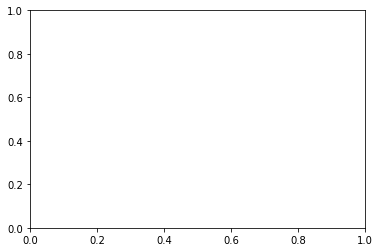

In [105]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_data_train,y_label_encoded_train)
y_predict = rfc.predict(X_data_test)
plotClassification(X_lda_test,le.inverse_transform(y_predict),'RFC_classes_predicted.png')

In [106]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 100):
    rfc = RandomForestClassifier(n_estimators=i, random_state=0)
    rfc.fit(X_data_train,y_label_encoded_train)
    pred_i = rfc.predict(X_data_test)
    error.append(np.mean(le.inverse_transform(pred_i) != y_classes_test))

Text(0, 0.5, 'Mean Error')

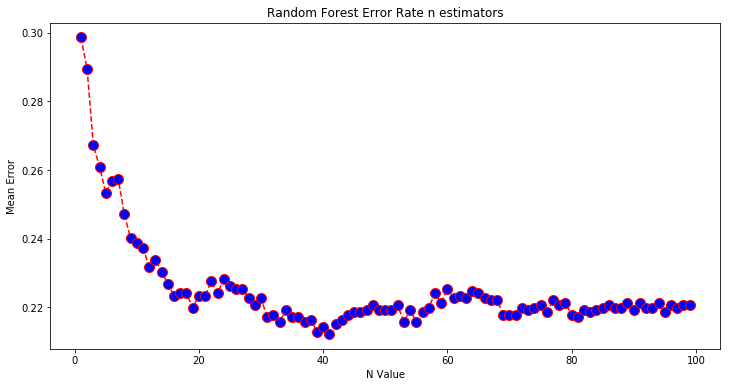

In [107]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Random Forest Error Rate n estimators')
plt.xlabel('N Value')
plt.ylabel('Mean Error')

In [108]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[593 151]
 [167 522]]
              precision    recall  f1-score   support

      barata      0.780     0.797     0.789       744
        cara      0.776     0.758     0.767       689

   micro avg      0.778     0.778     0.778      1433
   macro avg      0.778     0.777     0.778      1433
weighted avg      0.778     0.778     0.778      1433



### KNeighbors

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_lda_train,y_label_encoded_train)
y_predict = knn.predict(X_lda_test)

In [110]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[547 197]
 [204 485]]
              precision    recall  f1-score   support

      barata      0.728     0.735     0.732       744
        cara      0.711     0.704     0.708       689

   micro avg      0.720     0.720     0.720      1433
   macro avg      0.720     0.720     0.720      1433
weighted avg      0.720     0.720     0.720      1433



In [111]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_lda_train,y_label_encoded_train)
    pred_i = knn.predict(X_lda_test)
    error.append(np.mean(le.inverse_transform(pred_i) != y_classes_test))

Text(0, 0.5, 'Mean Error')

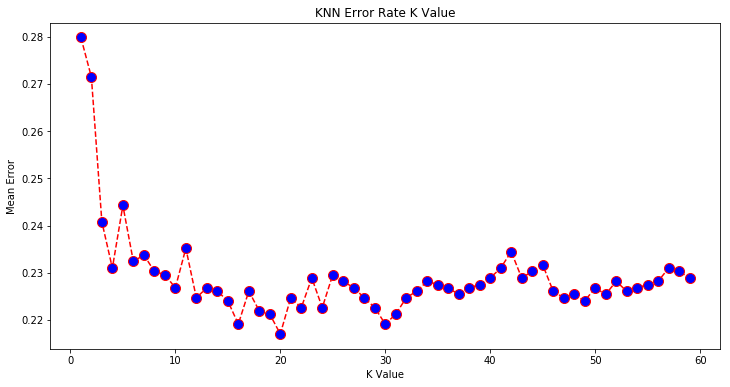

In [112]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 60), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('KNN Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [121]:
from sklearn.base import BaseEstimator, ClassifierMixin
from cvxopt import matrix, solvers
def _kernel_function(center, sigma, data_point):
    return np.exp(-1*(np.linalg.norm(np.subtract(center,data_point))**2 )/ (2 * sigma**2) )

class RBFN(BaseEstimator,ClassifierMixin):
    def __init__(self, hidden_shape, sigma = None, centers=None, weights=None, mode = 'classifier'):
        """ radial basis function network
        # Arguments
            input_shape: dimension of the input data
            e.g. scalar functions have should have input_dimension = 1
            hidden_shape: number of hidden radial basis functions,
            also, number of centers.
        """
        self.hidden_shape = hidden_shape
        self.sigma = sigma
        self.centers = centers
        self.weights = weights
        self.mode = mode
        
    def getIndicatorVariables(self,class_vector):
        numpy_class_vector = np.asarray(class_vector)
        classes_identified = np.unique(numpy_class_vector)
        output_dict = dict()
        for cur_class in classes_identified:
            output_dict[cur_class] = list()
        for element in class_vector:
            for key in output_dict.keys():
                output_dict[key].append(-1)
            #substitui o valor do último elemento da lista (-1) por 1 pois é a classe correspondente
            output_dict[element][-1] = 1
        return pd.DataFrame(output_dict)
    
    def getClassFromIndicatorVariables(self,indicator_variables):
        classes = list()
        for row in range(0,len(indicator_variables)): 
            for column in indicator_variables.columns:
                if indicator_variables.iloc[row][column] == 1:
                    classes.append(column)
        return classes       
        
    def getRBF_Centers_And_Std(self,X_data_train):    
        num_clusters = self.hidden_shape
        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=1, random_state=0)
        kmeans.fit(X_data_train)
        centers = kmeans.cluster_centers_
        distances = euclidean_distances(centers,centers)
        stds = list()
        for j in range(0,num_clusters):
            distance_to_other_centers = np.delete(distances[j],j)
            stds.append(distance_to_other_centers[np.argmin(distance_to_other_centers)])
        return centers,stds
    
    def _calculate_interpolation_matrix(self, X):
        """ Calculates interpolation matrix using a kernel_function
        # Arguments
            X: Training data
        # Input shape
            (num_data_samples, input_shape)
        # Returns
            U: Interpolation matrix
        """
        U = np.zeros((len(X), self.hidden_shape))
        for data_point_arg, data_point in enumerate(X):
            for center_arg, center in enumerate(self.centers):
                U[data_point_arg, center_arg] = _kernel_function(np.asarray(center), self.sigma[center_arg], np.asarray(data_point))
        return np.c_[np.ones(len(X)),U]
    
    def fit(self, X, Y):
        """ Fits weights using linear regression
        # Arguments
            X: training samples
            Y: targets
        # Input shape
            X: (num_data_samples, input_shape)
            Y: (num_data_samples, input_shape)
        """
        solvers.options['show_progress'] = False
        self.centers, self.sigma = self.getRBF_Centers_And_Std(X)
        if self.mode == 'classifier':
            Y_RBF = self.getIndicatorVariables(Y)
        else:
            Y_RBF = Y
        Y_RBF = np.asarray(Y_RBF)
        X = np.asarray(X)
        U = self._calculate_interpolation_matrix(X)
        P = matrix(np.matmul(U.transpose(), U))
        G = matrix(np.r_[-np.eye(self.hidden_shape + 1),np.eye(self.hidden_shape + 1)])
        h = matrix([np.sqrt(self.hidden_shape)]*2*(self.hidden_shape + 1))
        solution = np.ones(self.hidden_shape + 1)
        for i in range(len(Y_RBF[0])):
            q = matrix(-1*np.matmul(U.transpose(),Y_RBF[:,i]))
            #print(q)
            solution = np.c_[solution,solvers.qp(P,q,G,h)['x']]
        #delete the 1 vector:
        solution = np.delete(solution,0,1)
        self.weights = solution
        #self.weights = np.dot(np.matmul(np.linalg.pinv(result),U.transpose()), Y)
        
    def predict(self, X):
        """
        # Arguments
            X: test data
        # Input shape
            (num_test_samples, input_shape)
        """
        U = self._calculate_interpolation_matrix(np.asarray(X))
        predictions = np.dot(U, self.weights)
        if self.mode == 'classifier':
            predictions[predictions > 0] = 1
            predictions[predictions <= 0] = -1
            return self.getClassFromIndicatorVariables(pd.DataFrame.from_records(data=predictions))
        return predictions
        #,colummns=np.arange(len(predictions[0]))
      
    def predict_proba(self, X):
        U = self._calculate_interpolation_matrix(X)
        predictions = np.dot(U, self.weights)
        
        return predictions

In [122]:
np.asarray(X_data_train).shape

(1242, 33)

In [123]:
rbfn_instance=RBFN(2,None,None,None)
rbfn_instance.fit(X_data_train, y_label_encoded_train)
y_predict = rbfn_instance.predict(X_data_test)

In [124]:
print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))

[[591 153]
 [227 462]]
              precision    recall  f1-score   support

      barata      0.722     0.794     0.757       744
        cara      0.751     0.671     0.709       689

   micro avg      0.735     0.735     0.735      1433
   macro avg      0.737     0.732     0.733      1433
weighted avg      0.736     0.735     0.734      1433



In [117]:
_kernel_function(np.asarray([0,0]), 1,np.asarray([0,1]))

0.6065306597126334

In [118]:
from sklearn.model_selection import cross_val_score
rbf_cv_results = cross_val_score(estimator = rbfn_instance, X = X_data_train, y = y_label_encoded_train, cv = 10)

In [119]:
rbf_cv_results

array([0.74603175, 0.75806452, 0.71774194, 0.75      , 0.62096774,
       0.61290323, 0.75806452, 0.78225806, 0.75806452, 0.74193548])

In [120]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC 
pca = PCA(n_components=0.9, svd_solver = 'full')
X_reduced = pca.fit_transform(scale(X_data_train))
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
LR = LogisticRegression()
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
rbfn_instance=RBFN(2,None,None,None)
svc = SVC(gamma='scale')
clf = [rfc, knn, svc, LR, gnb, lda, qda, rbfn_instance]
eclf = VotingClassifier(estimators=[('Random Forests', rfc), ('Logistic Regression', LR), ('KNeighbors', knn), ('SVC', svc), ('GNB', gnb), ('LDA', lda), ('QDA',qda),('RBF', rbfn_instance)], voting='hard')
for clf, label in zip([rfc,LR,knn,svc,gnb,lda,qda,rbfn_instance, eclf], ['Random Forests','Logistic Regression','KNeighbors','SVC','GNB','LDA','QDA','RBF', 'Ensemble']):
    clf.fit(X_data_train, y_label_encoded_train)
    y_predict = clf.predict(X_data_test)
    print('-----------------------------------------------------\n')
    print('>>> '+label)
    print(metrics.confusion_matrix(y_classes_test,le.inverse_transform(y_predict)))
    print(metrics.classification_report(y_classes_test,le.inverse_transform(y_predict),digits = 3))    
    print('-----------------------------------------------------\n\n')

/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


-----------------------------------------------------

>>> Random Forests
[[593 151]
 [167 522]]
              precision    recall  f1-score   support

      barata      0.780     0.797     0.789       744
        cara      0.776     0.758     0.767       689

   micro avg      0.778     0.778     0.778      1433
   macro avg      0.778     0.777     0.778      1433
weighted avg      0.778     0.778     0.778      1433

-----------------------------------------------------


-----------------------------------------------------

>>> Logistic Regression
[[581 163]
 [157 532]]
              precision    recall  f1-score   support

      barata      0.787     0.781     0.784       744
        cara      0.765     0.772     0.769       689

   micro avg      0.777     0.777     0.777      1433
   macro avg      0.776     0.777     0.776      1433
weighted avg      0.777     0.777     0.777      1433

-----------------------------------------------------




/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


-----------------------------------------------------

>>> KNeighbors
[[545 199]
 [205 484]]
              precision    recall  f1-score   support

      barata      0.727     0.733     0.730       744
        cara      0.709     0.702     0.706       689

   micro avg      0.718     0.718     0.718      1433
   macro avg      0.718     0.717     0.718      1433
weighted avg      0.718     0.718     0.718      1433

-----------------------------------------------------


-----------------------------------------------------

>>> SVC
[[596 148]
 [178 511]]
              precision    recall  f1-score   support

      barata      0.770     0.801     0.785       744
        cara      0.775     0.742     0.758       689

   micro avg      0.773     0.773     0.773      1433
   macro avg      0.773     0.771     0.772      1433
weighted avg      0.773     0.773     0.772      1433

-----------------------------------------------------


-----------------------------------------------------



/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-----------------------------------------------------

>>> RBF
[[591 153]
 [227 462]]
              precision    recall  f1-score   support

      barata      0.722     0.794     0.757       744
        cara      0.751     0.671     0.709       689

   micro avg      0.735     0.735     0.735      1433
   macro avg      0.737     0.732     0.733      1433
weighted avg      0.736     0.735     0.734      1433

-----------------------------------------------------




/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


-----------------------------------------------------

>>> Ensemble
[[615 129]
 [207 482]]
              precision    recall  f1-score   support

      barata      0.748     0.827     0.785       744
        cara      0.789     0.700     0.742       689

   micro avg      0.766     0.766     0.766      1433
   macro avg      0.769     0.763     0.763      1433
weighted avg      0.768     0.766     0.764      1433

-----------------------------------------------------




In [125]:
lim1

0.10220992783317125